### The dataset
The data I will be using in this demonstration of a simple linear regression has been downloaded from this Kaggle source: https://www.kaggle.com/datasets/ashydv/housing-dataset. <br>
This housing dataset has 13 variables, including one target variable, price, and 12 predictors. A simple regression only uses one predictor, and so I have chosen area as it is the only other continuous variable. The column 'area' contains values of the square footage of each house. 

In [4]:
#Importing necessary libraries for loading the data, feature engineering, and visualizations. 
#I will import more libraries as and when they are necessary
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np   

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")  

In [5]:
#reading the csv file
housing_data = pd.read_csv('Housing.csv')

#how many rows and columns are in the dataset?
housing_data.shape

(545, 13)

The .shape function tells is that the housing dataset has 545 observations.

In [7]:
#displaying the first five rows of the dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Feature Engineering

For our simple linear regression model, we need only 2 columns (also called features or variables) - price and area. So let's remove all other variables and focus on those. 

In [8]:
slrdf = housing_data[['price', 'area']]
slrdf.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


### Visualizing Data points, the line of best fit, and residuals

In [24]:
#Looking at the summary statistics of the dataset to understand the range of values
slrdf.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


Text(0.5, 1.0, 'Scatter Plot of Area vs Price')

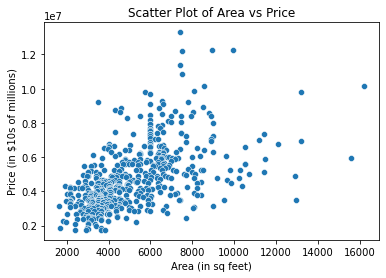

In [9]:
# Defining the price as the dependent variable Y, and the area of the house as the independent variable X in the 
# scatterplot, and plotting the data. Y is on the Y axis and X is plotted on the X axis.
sns.scatterplot(x='area', y='price', data=slrdf)

# Add axis labels and a title to the graph
plt.xlabel("Area (in sq feet)")
plt.ylabel("Price (in $10s of millions)")
plt.title("Scatter Plot of Area vs Price")

To visualize the data, Seaborn's **scatterplot** function has been used. Building a scatterplot is a good way to explore raw relationships between two variables.

Text(0.5, 1.0, 'Scatter Plot of Area vs Price')

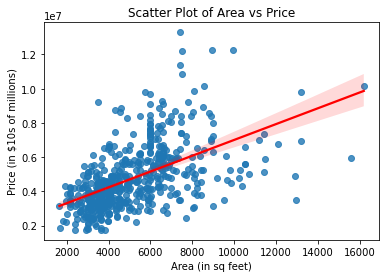

In [10]:
#Plotting the data points on a scatterplot and adding a line of best fit
fig2 = sns.regplot(data=slrdf, x= "area", y="price", line_kws={'color': 'red'})

# Add axis labels and a title to the graph
plt.xlabel("Area (in sq feet)")
plt.ylabel("Price (in $10s of millions)")
plt.title("Scatter Plot of Area vs Price")

To identify a trend in the data, Seaborn's regplot function has been used. This function is different from scatterplot in that it helps us to build a scatterplot and fit a regression line on the data with no heavy computing involved from the user. Regplot calculates the coefficient and slope without showing it to us. We will learn how to do this in later steps. 

In [11]:
# Compute regression coefficients (slope and intercept) to use for the below regression plot
pfslope, pfintercept = np.polyfit(slrdf["area"], slrdf["price"], 1)

One line of code to find the slope and y-intercept of our regression line. Pretty smooth, right? This function takes in 3 arguments: the x variable, the y variable, and the degree of the polynomial. Because we are building a linear regression model, we know from the formula that x is a first-degree polynomial. <br>

While the NumPy polyfit is a completely acceptable function to build a regression line, there are a few more steps we need to undertake to do it the Machine Learning way. For now, let's use this function because our focus here is building a plot that demonstrates what residuals are visually. And we can't really do that without the predictions of a line of best fit. 

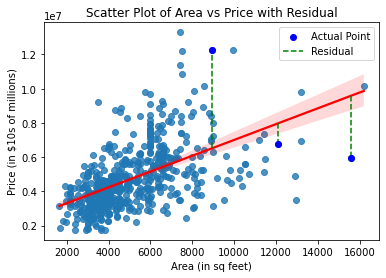

In [13]:
# Create scatter plot with regression line
sns.regplot(data=slrdf, x="area", y="price", line_kws={'color': 'red'})

#Building a for-loop to map the actual y value and the predicted y value. 
for idx, i in enumerate([1, 69, 125]):  
    sample_x = slrdf["area"].iloc[i]
    sample_y = slrdf["price"].iloc[i]
    predicted_y = pfslope * sample_x + pfintercept

#The residual is the length of the distance between these two points
    actual_label = "Actual Point" if idx == 0 else ""
    residual_label = "Residual" if idx == 0 else ""
# The above 2 lines of code are for the legend

# Plot the example observation using a different color
    plt.scatter(sample_x, sample_y, color='blue', label=actual_label, zorder=3)

# Draw the residual line from the predicted sample y value to the sample point
    plt.vlines(x=sample_x, ymin=predicted_y, ymax=sample_y, color='green',
               linestyle='dashed', label=residual_label)

# Axes labels and title
plt.xlabel("Area (in sq feet)")
plt.ylabel("Price (in $10s of millions)")
plt.title("Scatter Plot of Area vs Price with Residual")
plt.legend()
plt.show()

Scroll down to the near end of the code file to learn how fig. 4 is plotted

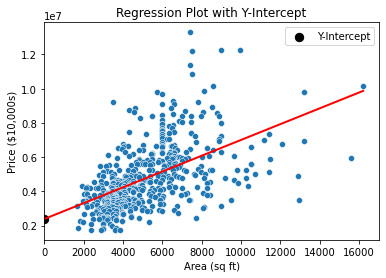

In [18]:
#Plotting the y-intercept
# Compute the regression line (slope & intercept)
pfslope, pfintercept = np.polyfit(slrdf["area"], slrdf["price"], 1)

# Create the scatter plot with regression line
sns.scatterplot(x='area', y='price', data=slrdf)

# Manually plot the regression line using slope and intercept
x_values = np.linspace(0, max(slrdf["area"]), 100)
y_values = pfslope * x_values + pfintercept
plt.plot(x_values, y_values, color='red', linewidth=2)

# Mark the y-intercept (where x=0)
plt.scatter(0, pfintercept, color='black', s=70, label="Y-Intercept")
plt.xlim(left=0)

# Labels and title
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($10,000s)")
plt.title("Regression Plot with Y-Intercept")
plt.legend()
plt.show()

### Building the Model

In [28]:
from sklearn.model_selection import train_test_split
# Define independent (X) and dependent (y) variables
X = slrdf["area"].values.reshape(-1, 1)
y = slrdf["price"].values

# Split into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The dataset is to be split into 2 subsets. 80% of the dataset will be used for training the model, and 20% of the dataset will be used to test and evaluate the model’s performance. We do this because to evaluate a model's performance, we need to compare the actual y values to the predicted y values. We couldn't just generate random square footage data because once we make a prediction, how can we test how close those values are to the actual price?

#### Using SciKit Learn

In [29]:
from sklearn.linear_model import LinearRegression
# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In these two steps, we have defined the 'model' to be a linear regression model, and we have train the model using the training datasets X_train, y_train. The fit funtion takes in 2 arguments; the X values and the Y values.

In [30]:
#Calculate and print β₁ (slope/ coefficient) and β₀ (y-intercept)
slope = model.coef_[0]  
intercept = model.intercept_  
print('Coefficient: '+ str(slope))
print('Intercept: '+ str(round(intercept,2)))

Coefficient: 425.7298419387828
Intercept: 2512254.26


The above section is calculating the β0 (y-intercept) and β1 (slope/ coefficient) values from the model and printing them. 

#### Coded Manually

In [45]:
#Calculate and print β₁ (coefficient)
#Function's arguments are X and Y values (in this case, from the training dataset)
def betaone(xtrain, ytrain):
#Computing the means xbar and ybar by using NumPy's mean function over the x and y variables
    xbar = np.mean(xtrain)
    ybar = np.mean(ytrain)

#Building a for-loop to calculate deviation of x and y at each observation (i) 
#by subtracting the mean from the obs.
    xycov = 0
    xsdev = 0
    for i in range(len(xtrain)):
        xdev = xtrain[i] - xbar
        ydev = ytrain[i] - ybar
        
#Using the formula to calculate the XY covariance (another name for the numerator in the formula) and summing each
#result for every observation.
        xycov += xdev * ydev
    
#Using the formula to calculate the square of the X deviance (another name for the denominator in the formula)  
#and summing each result for every observation.
        xsdev += xdev * xdev

#Dividing the XY covariance by the square of the X deviance and returning the value
    return (xycov / xsdev).item()
 
coeff = betaone(X_train, y_train)


#Calculate and print β₀ (y-intercept)
#Function's arguments are X and Y values (in this case, from the training dataset), and the coefficient calculated
#by the betaone function above.
def betazero(xtrain, ytrain, c):
#Computing the means xbar and ybar by using NumPy's mean function over the x and y variables
    xbar = np.mean(xtrain)
    ybar = np.mean(ytrain)
    
#Returning the result of the β zero formula   
    return ybar - coeff * xbar

interc = betazero(X_train, y_train, coeff)

#Printing the results
print('Coefficient: '+ str(coeff))
print('Intercept: '+ str(interc))

Coefficient: 425.7298419387829
Intercept: 2512254.263959343


Manually coding the functions takes a few more steps, but enforces the math we studied in the article. Here, I have defined 2 functions, *betaone* and *betazero*, to calculate the coefficient and y-intercept.

In [47]:
# Let's check to see if there is a difference between the values calculated using the scikit library,
# and those calculated manually.
# scikit list
coef_list = [intercept, slope]

# manual list
man_list = [interc,coeff]

# Make a dataframe to compare values
ddf = pd.DataFrame({"scikit list": coef_list, "manual list": man_list})

#calculating the absolute difference between each corresponding value
total_abs_diff = sum(abs(a - b) for a, b in zip(coef_list, man_list))  

# show values
print(total_abs_diff)
ddf.head()

9.314362614532001e-10


,scikit list,manual list
0,2.512254e+06,2.512254e+06
1,4.257298e+02,4.257298e+02


The above dataframe proves that we are comparing like values from each calculation method. The difference between the two values is -  0.0000000009314362614532001 -, so negligible that even if the difference were to be rounded to the ninth decimal value, it would be 0. Those are practically the same numbers!

### Prediction

#### Using SciKit Learn 

In [32]:
# Predict house prices on test data
Y_pred = model.predict(X_test)
Y_pred[0:5]

array([5024060.33139816, 5279498.23656143, 4232202.82539203,
       4640903.47365326, 4198144.43803692])

We used model.fit to train the model, now we are using model.predict to get the model's predictions of house prices based on the square footage values in X_test. I am only outputting the first five predictions so you can see them.

#### Manually Coded

In [33]:
# Predict house prices on test data
def slr_predictions(xtest, c,i):
#Initializing the ypred list that will hold all predictions given by the model. 
    ypred = []
    
#For each observation x, its corresponding y is calculated using the lin. reg. formula and added to the ypred list
    for x in xtest:
        y = i + c*x
        ypred.append(y)      
    return ypred

slr_predictions(X_test, coeff,interc)[0:5]

[array([5024060.33139816]),
 array([5279498.23656143]),
 array([4232202.82539203]),
 array([4640903.47365326]),
 array([4198144.43803692])]

I am using the Y = β₀ + β₁X formula to manually calculate the predictions of this model,. I am using the outputs of the *betaone* and *betazero* functions as my β₀ and β₁ values respectively.

### Model Evaluation

#### Using SciKit Learn 

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Calculate Evaluation Metrics:
#Mean absolute error
mae = mean_absolute_error(y_test, Y_pred)
#Mean square error
mse = mean_squared_error(y_test, Y_pred)
#Root mean square error
rmse = np.sqrt(mse)
#R-square score
r2 = r2_score(y_test, Y_pred)

# Print Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
Root Mean Squared Error (RMSE): 1917103.70
R² Score: 0.2729


Scikit learn also has in-built functions for evaluations. The Mean absolute error, mean squared error, and R-squared score can be calculated using their corresponding functions. Root mean squared error is calculated by taking the square root of MSE, which can be calculated in one line of code.

#### Manually Coded

In [44]:
#Calculating MAE
def mae(ytest, ypred):
    total_res = 0
    for i in range(len(ytest)):
#Calculating the absolute residual for each observation (|y actual - y predicted|)
        residual = np.abs(ytest[i] - ypred[i])
    
#Summing up all the residuals
        total_res += residual
    
#Calculating the average absolute residuals by dividing the total absolute residuals by the the no. of obs. 
    mae_score = total_res/len(ytest)
    return mae_score

mmae = mae(y_test, Y_pred)


#Calculating MSE
def mse(ytest, ypred):
    total_res = 0
    for i in range(len(ytest)):
#Calculating the residual for each observation (y actual - y predicted)
        residual = ytest[i] - ypred[i]
    
#Calculating the square of the residual for each observation
        total_res += residual**2
    
#Calculating the average squared residuals by dividing the total absolute residuals by the the no. of obs.
    mse_score = total_res/len(ytest)
    return mse_score

mmse = mse(y_test, Y_pred)


#Calculating RMSE
def rmse(ytest, ypred): 
    total_res = 0
    for i in range(len(ytest)):
#Calculating the residual for each observation (y actual - y predicted)
        residual = ytest[i] - ypred[i]
    
#Calculating the square of the residual for each observation
        total_res += residual**2
    
#Calculating the average squared residuals by dividing the total absolute residuals by the the no. of obs.
    mse_score = total_res/len(ytest)
    
#Calculating the square root of the MSE score
    rmse_score = mse_score**0.5
    return rmse_score

mrsme = rmse(y_test, Y_pred)


#Calculating R Squared
def Rsq(ytest, ypred):
#Calculating SSR (the numerator of the SSR formula)
    SSR = 0
    for i in range(len(ytest)):
#Calculating the residual for each observation (y actual - y predicted)
        residual = ytest[i] - ypred[i]
    
#According to the SSR formula, SSR is the residual squared 
        SSR += residual**2
    
#Calculating the mean of the actual Y values for SST
    Y_mean = np.mean(ytest)
    
    SST = 0
    for i in range(len(ytest)):
#Calculating the variance in the actual Y values (subtracting the mean from each y obs)
        var = ytest[i] - Y_mean
    
#According to the SST formula, SST is the variance squared 
        SST += var**2
    
#Finally, we apply the R-squared formula using SSR and SST. The explained variance ratio is subtracted from 1.
    rsquared = 1 - (SSR/SST)
    return rsquared

mr2 = Rsq(y_test, Y_pred)


# Print Results
print(f"Mean Absolute Error (MAE): {mmae:.2f}")
print(f"Mean Squared Error (MSE): {mmse:.2f}")
print(f"Root Mean Squared Error (RMSE): {mrsme:.2f}")
print(f"R² Score: {mr2:.4f}")

Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.18
Root Mean Squared Error (RMSE): 1917103.70
R² Score: 0.2729


### Histogram of residuals

In [36]:
#Calculating Residuals, and adding it to a new dataframe
resdf = slrdf[['price', 'area']]
allpred = model.predict(X)
residuals = y - allpred
resdf['residuals'] = residuals

To see the distribution of the residuals, let's calculate them first. If you look closely, you'll notice that these residuals are slightly different from the ones that we've been using. The difference is that we had been looking at the residuals between the y actual and y predicted values of the test set. Now we are calculating the residuals for ALL observations in the dataset.

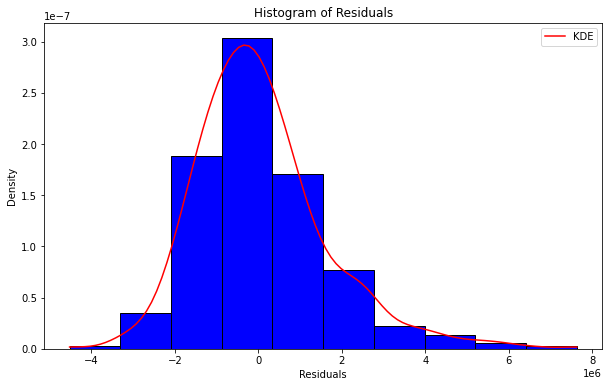

In [37]:
# Plot histogram of residuals using matplotlib
#Inititalizing the size of the plot
plt.figure(figsize=(10, 6))
#Telling the hist function which variable we want to plot, how many bins we want, and the colors
plt.hist(residuals, bins=10, color='blue', edgecolor='black', density=True)

# KDE line (manual alternative)
from scipy.stats import gaussian_kde
#Using the Python scipy statistics library, we are drawing a distribution line based on the histogram
kde = gaussian_kde(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x, kde(x), color='red', label='KDE')

plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")
plt.legend()
plt.show()

### Heteroscedasticity Function of Fun

In [38]:
def hff(upperlim, lowerlim):
    # Calculate the upperlimit-th and lower-limit-th percentiles for each column
    lower = resdf['residuals'].quantile(lowerlim)
    upper = resdf['residuals'].quantile(upperlim)

    # Filter out rows where values are outside the upperlimit-th and lower-limit-th percentiles
    filtered_df = resdf[(resdf['residuals'] >= lower) & (resdf['residuals'] <= upper)]
    
    # Define independent (X) and dependent (y) variables
    X = filtered_df["area"].values.reshape(-1, 1)
    y = filtered_df["price"].values

    # Step 1: Split into Training and Testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 2: Train the model on training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Step 3: Predict house prices on test data
    Y_pred = model.predict(X_test)
    
    # Step 4: Calculate Evaluation Metrics
    mae = mean_absolute_error(y_test, Y_pred)
    mse = mean_squared_error(y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, Y_pred)

    # Print Results
    print('The new MEA is '+ str(round(mae,2)) + ', which is '+ str(round(1474748.13 - mae,2)) + ' lower than the original score.')
    print('The new MSE is '+ str(round(mse,2)) + ', which is '+ str(round(3675286604768.18 - mse,2)) + ' lower than the original score.')
    print('The new RMSE is '+ str(round(rmse,2)) + ', which is '+ str(round(1917103.70 - rmse,2)) + ' lower than the original score.')
    print('The new R² score is '+ str(round(r2,2)) + ', which is '+ str(round(r2-0.27,2)) + ' higher than the original score.')

Here are some example inputs and results

In [39]:
hff(0.95, 0.05)

The new MEA is 898907.22, which is 575840.91 lower than the original score.
The new MSE is 1201749864167.1, which is 2473536740601.08 lower than the original score.
The new RMSE is 1096243.52, which is 820860.18 lower than the original score.
The new R² score is 0.57, which is 0.3 higher than the original score.


In [40]:
hff(0.60, 0.40)

The new MEA is 159235.92, which is 1315512.21 lower than the original score.
The new MSE is 29830928596.73, which is 3645455676171.44 lower than the original score.
The new RMSE is 172716.32, which is 1744387.38 lower than the original score.
The new R² score is 0.97, which is 0.7 higher than the original score.


In [41]:
hff(0.75, 0.25)

The new MEA is 463066.42, which is 1011681.71 lower than the original score.
The new MSE is 275732237081.44, which is 3399554367686.74 lower than the original score.
The new RMSE is 525102.12, which is 1392001.58 lower than the original score.
The new R² score is 0.69, which is 0.42 higher than the original score.
